In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Resolution

### Lagrangian multipliers

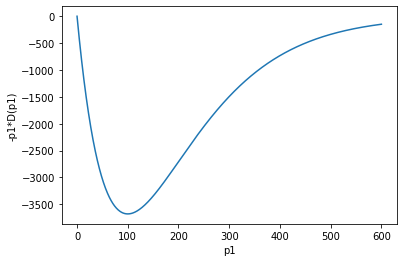

In [2]:

#D_i - this function returns the number of people that will buy a ticket at price p belonging to the price bucket a
def DFunc(p,a):
    return a*np.exp(-p*(1/a))

#- D_i * p_i - this function represents the revenue related to tickets having price p and belonging to the price bucket a
def Revenue(p,a):
    return -p*DFunc(p,a)

pRange = np.linspace(0,600,1200)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
#ax1.set_title("Cost Function profile along the plane y, p1")
ax1.set_xlabel("p1")
ax1.set_ylabel("-p1*D(p1)")
ax1.plot(pRange,Revenue(pRange,100))

plt.savefig("D:\\BIG_DATA\\DSTI\\OneDrive - Data ScienceTech Institute\\2020-05-25-MetaHeuristic\\assignement\\explanation\\Figures\\" + "CostFunction.png",bbox_inches='tight')

In [3]:
#solution of Lagrange equation when all lambdas are set to 0 except for 
#lambda4 (Lagrange multiplier for the constraint on the number of people) 

def myFunction(z):
    p1 = z[0]
    p2 = z[1]
    p3 = z[2]
    lambda4 = z[3]
    
    F = np.empty((4))
    F[0] = ((p1-100) - lambda4)*np.exp(-p1/100)
    F[1] = ((p2-150) - lambda4)*np.exp(-p2/150)
    F[2] = ((p3-300) - lambda4)*np.exp(-p3/300)
    F[3] = ( 100 * np.exp(-p1/100) + 150 * np.exp(-p2/150) + 300 * np.exp(-p3/300) - 150)
    
    return F


#grid of initial guess
p1Range = [i for i in range(50,151,10)]

p2Range = [i for i in range(100,201,10)]

p3Range = [i for i in range(250,351,10)]

lambda4Range = [i for i in range(10,111,10)]

resultP1 = list()
resultP2 = list()
resultP3 = list()
result   = list()

# I tested several possible initial guess for the fsolve routine

for i in p1Range:
    
    for j in p2Range:
        
        for l in p3Range:
            
            for m in lambda4Range:
                
                zGuess = np.array([i, j, l, m])
    
                resultIntermediate = fsolve(myFunction,zGuess)
                
                result.append(resultIntermediate)
                
                resultP1.append(resultIntermediate[0])
                
                resultP2.append(resultIntermediate[1])
                
                resultP3.append(resultIntermediate[2])


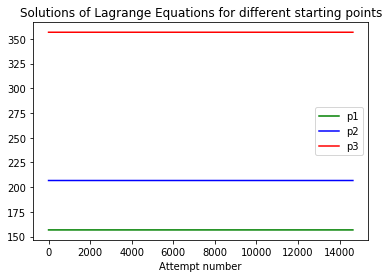

In [4]:
#Solutions are the same regardless the initial guess

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_title("Solutions of Lagrange Equations for different starting points")
ax1.set_xlabel("Attempt number")
ax1.plot(range(1,len(resultP1)+1), resultP1, 'g', range(1,len(resultP1)+1),resultP2,'b',range(1,len(resultP1)+1),resultP3,'r')
ax1.legend(['p1','p2','p3'])

plt.savefig("D:\\BIG_DATA\\DSTI\\OneDrive - Data ScienceTech Institute\\2020-05-25-MetaHeuristic\\assignement\\explanation\\Figures\\" + "SolLagrange.png",bbox_inches='tight')

In [5]:
print("First price bucket is {0}, and {1} people are meant to by a ticket at this price for {2}.\n".format(result[0][0],DFunc(result[0][0],100),-1*(Revenue(result[0][0],100) )))
print("Second price bucket is {0}, and {1} people are meant to by a ticket at this price for {2}.\n".format(result[0][1],DFunc(result[0][1],150),-1*(Revenue(result[0][1],150))))
print("First price bucket is {0}, and {1} people are meant to by a ticket at this price for {2}.\n".format(result[0][2],DFunc(result[0][2],300),-1*(Revenue(result[0][2],300))))
print("In total {0} people are meant to buy a ticket\n".format(DFunc(result[0][0],100) + DFunc(result[0][1],150) + DFunc(result[0][2],300)))
print("Total earning: {0}".format(-1*(Revenue(result[0][0],100) + Revenue(result[0][1],150) + Revenue(result[0][2],300))))

First price bucket is 156.74841942205822, and 20.856924256961985 people are meant to by a ticket at this price for 3269.2899112843775.

Second price bucket is 206.74841952517284, and 37.80012831746722 people are meant to by a ticket at this price for 7815.116787485078.

First price bucket is 356.74841956052893, and 91.34294743994501 people are meant to by a ticket at this price for 32586.452137200842.

In total 150.00000001437422 people are meant to buy a ticket

Total earning: 43670.8588359703


## Sensitivity analysis

### Relative Variation of the revenues changing one price at a time of 1%:

In [6]:
#decrease p1 of 1%
( Revenue(result[0][0]*0.99,100) - Revenue(result[0][0],100)) /(( Revenue(result[0][0],100) + Revenue(result[0][1],150) + Revenue(result[0][2],300)))

0.0004222483985195773

In [7]:
#decrease p2 of 1%
( Revenue(result[0][1]*0.99,150) - Revenue(result[0][1],150)) /(( Revenue(result[0][0],100) + Revenue(result[0][1],150) + Revenue(result[0][2],300)))

0.0006692679336926878

In [8]:
#decrease p3 of 1%
( Revenue(result[0][2]*0.99,300) - Revenue(result[0][2],300)) /(( Revenue(result[0][0],100) + Revenue(result[0][1],150) + Revenue(result[0][2],300)))

0.0013751960974212759

### Relative Variation of the people changing one price at a time of 1%:

In [9]:
#decrease p1 of 1%
( DFunc(result[0][0]*0.99,100) - DFunc(result[0][0],100)) /(( DFunc(result[0][0],100) + DFunc(result[0][1],150) + DFunc(result[0][2],300)))

0.0021966980775627383

In [10]:
#decrease p2 of 1%
( DFunc(result[0][1]*0.99,150) - DFunc(result[0][1],150)) /(( DFunc(result[0][0],100) + DFunc(result[0][1],150) + DFunc(result[0][2],300)))

0.003497432826273852

In [11]:
#decrease p3 of 1%
( DFunc(result[0][2]*0.99,300) - DFunc(result[0][2],300)) /(( DFunc(result[0][0],100) + DFunc(result[0][1],150) + DFunc(result[0][2],300)))

0.00728466115304396

In [12]:
#decrease p1, p2, p3 of 1% simultaneously
(DFunc(result[0][0]*0.99,100) +  DFunc(result[0][1]*0.99,150) +  DFunc(result[0][2]*0.99,300) - (DFunc(result[0][0],100) +  DFunc(result[0][1],150) +  DFunc(result[0][2],300))) / (DFunc(result[0][0],100) +  DFunc(result[0][1],150) +  DFunc(result[0][2],300))


0.012978792056880479

### Absolute Variation of the people changing one price at a time of 1%:

In [13]:
#decrease p1 of 1%:
( DFunc(result[0][0]*0.99,100) - DFunc(result[0][0],100))

0.3295047116659866

In [14]:
#decrease p2 of 1%:
( DFunc(result[0][1]*0.99,150) - DFunc(result[0][1],150))

0.5246149239913507

In [15]:
#decrease p3 of 1%:
( DFunc(result[0][2]*0.99,300) - DFunc(result[0][2],300))

1.0926991730613054

In [16]:
#decrease p1,p2,p3 of 1% simultaneously:
DFunc(result[0][0]*0.99,100) +  DFunc(result[0][1]*0.99,150) +  DFunc(result[0][2]*0.99,300) - (DFunc(result[0][0],100) +  DFunc(result[0][1],150) +  DFunc(result[0][2],300))

1.946818808718632

### Absolute Variation of the revenues changing one price at a time of 1%:

In [17]:
#decrease p1 of 1%:
-( Revenue(result[0][0]*0.99,100) - Revenue(result[0][0],100)) 

18.439950205462992

In [18]:
#decrease p2 of 1%:
-( Revenue(result[0][1]*0.99,150) - Revenue(result[0][1],150))

29.2275054557349

In [19]:
#decrease p3 of 1%:
-( Revenue(result[0][2]*0.99,300) - Revenue(result[0][2],300))

60.055994642261794

In [20]:
#decrease p1, p2, p3 of 1%:
-( Revenue(result[0][0]*0.99,100) - Revenue(result[0][0],100)) -( Revenue(result[0][1]*0.99,150) - Revenue(result[0][1],150)) -( Revenue(result[0][2]*0.99,300) - Revenue(result[0][2],300))

107.72345030345969

### Absolute variation of people if prices decrease of 1.5%

In [29]:
print("New prices: \n p1 ={0} \n p2 ={1} \n p3 ={2}".format(result[0][0]*0.985, result[0][1]*0.985, result[0][2]*0.985 ))

New prices: 
 p1 =154.39719313072735 
 p2 =203.64719323229525 
 p3 =351.397193267121


In [21]:
DFunc(result[0][0]*0.985,100) +  DFunc(result[0][1]*0.985,150) +  DFunc(result[0][2]*0.985,300) - (DFunc(result[0][0],100) +  DFunc(result[0][1],150) +  DFunc(result[0][2],300))

2.9297913779934674

### Absolute variation of revenues if prices decrease of 1.5%

In [22]:
-( Revenue(result[0][0]*0.985,100) - Revenue(result[0][0],100)) -( Revenue(result[0][1]*0.985,150) - Revenue(result[0][1],150)) -( Revenue(result[0][2]*0.985,300) - Revenue(result[0][2],300))

160.03511881642817

### Alternative method

In [23]:
DeltaP = -3 / ( + DFunc(result[0][0],100)/100 + DFunc(result[0][1],150)/150 + DFunc(result[0][2],300)/300)

print("Delta P = {0}".format(DeltaP))

Delta P = -3.921329813411776


In [24]:
OldRevenue = -1 * ( Revenue(result[0][0],100) + Revenue(result[0][1],150) + Revenue(result[0][2],300))

NewRevenue = -1 * ( Revenue(result[0][0] + DeltaP,100) + Revenue(result[0][1] + DeltaP,150) + Revenue(result[0][2] + DeltaP,300))

print("Variation % of revenues if the airplane transports 153 people rather than 150: {0} %.".format(100*(NewRevenue - OldRevenue)/OldRevenue))
print("Absolute Variation of revenues if the airplane transports 153 people rather than 150: {0}.".format((NewRevenue - OldRevenue)))

Variation % of revenues if the airplane transports 153 people rather than 150: 0.3809687102029361 %.
Absolute Variation of revenues if the airplane transports 153 people rather than 150: 166.372307641941.


#### Absolute variation of people using Alternative Method

In [25]:
DFunc(result[0][0]+DeltaP,100) +  DFunc(result[0][1]+DeltaP,150) +  DFunc(result[0][2]+DeltaP,300) - (DFunc(result[0][0],100) +  DFunc(result[0][1],150) +  DFunc(result[0][2],300))


3.037114462907624

#### Absolute variation of revenues using Alternative Method

In [26]:
-( Revenue(result[0][0]+DeltaP,100) - Revenue(result[0][0],100)) -( Revenue(result[0][1]+DeltaP,150) - Revenue(result[0][1],150)) -( Revenue(result[0][2]+DeltaP,300) - Revenue(result[0][2],300))

166.37230764194646

## Re-run the Langrange system with 153

In [27]:
def myFunction(z):
    p1 = z[0]
    p2 = z[1]
    p3 = z[2]
    lambda4 = z[3]
    
    F = np.empty((4))
    F[0] = ((p1-100) - lambda4)*np.exp(-p1/100)
    F[1] = ((p2-150) - lambda4)*np.exp(-p2/150)
    F[2] = ((p3-300) - lambda4)*np.exp(-p3/300)
    F[3] = ( 100 * np.exp(-p1/100) + 150 * np.exp(-p2/150) + 300 * np.exp(-p3/300) - 153)
    
    return F


resultIntermediate = fsolve(myFunction,zGuess)

In [28]:
resultIntermediate

array([152.87443254, 202.87443244, 352.87443251,  52.87443249])

In [31]:
#variation of people with new prices corresponding to flights with 153 peopele
DFunc(resultIntermediate[0],100) +  DFunc(resultIntermediate[1],150) +  DFunc(resultIntermediate[2],300) - (DFunc(result[0][0],100) +  DFunc(result[0][1],150) +  DFunc(result[0][2],300))

2.99999998567327

In [33]:
-( Revenue(resultIntermediate[0],100) - Revenue(result[0][0],100)) -( Revenue(resultIntermediate[1],150) - Revenue(result[0][1],150)) -( Revenue(resultIntermediate[2],300) - Revenue(result[0][2],300))

164.41077931597738